# Домашнее задание 1 - Знакомство с временными рядами

## Необходимо проанализировать 6 временных рядов:
- daily-total-female-births-in-cal
- international-airline-passengers
- mean-monthly-air-temperature-deg
- monthly-boston-armed-robberies-j
- monthly-sales-of-company-x-jan-6
- weekly-closings-of-the-dowjones-

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

### Используемые функции

In [2]:
#Функция выдаёт результаты теста Дика-Фуллера(p-value, статистику, количество лагов, количество точек) на стационарность
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [30]:
# Функция выдаёт результаты теста Дика-Фуллера при помощи функции test_stationarity.Проверяет принадлежность объекта указнному классу(в данном случае pd.Series)
# Затем выводит 3 графика: временной ряд, автокорелляция, частитчная автокорелляция перед этим идёт настройка поля отображения'''
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

### Загрузим данные

In [18]:
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")
female_births.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [19]:
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
airlines_passengers.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
mean_monthly_temp.head()

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [21]:
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
robberies_in_boston.head()

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43


In [22]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
sales_of_company_x.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [23]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
dowjones_closing.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


### Проверка на стационарность

H0 - ряд нестационарный, H1 - ряд стационарный.

В каждом ряде ищем сезонность и тренд. Затем постепенно убирая сезенность и тренд приводим ряд к стационарному состянию, оценивая его стационраность по тесту Дикки-Фуллера ('p-value < 0,05' => ряд стационарный).

In [24]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Daily total female births in California": female_births["Count"]
}

In [26]:
# all_series

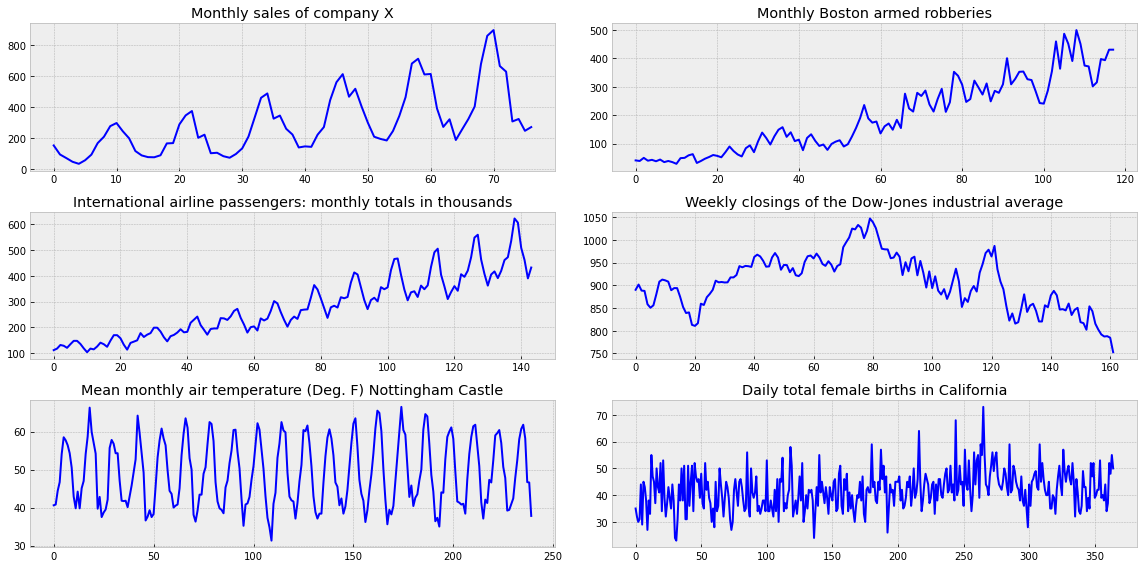

In [27]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

#### Попробуем визуально оценить наличие тренда и сезонности: 
- "Monthly sales of company X": тренд и сезонность  
- "Monthly Boston armed robberies": тренд
- "International airline passengers: monthly totals in thousands": сезонность и тренд 
- "Weekly closings of the Dow-Jones industrial average": вероятно имеется тренд
- "Mean monthly air temperature (Deg. F) Nottingham Castle": сезонность
- "Daily total female births in California": визуально ни тренда ни сезонности не наблюдается 

##### Оценим стационарность всех рядов по тесту Дика-Фуллера

In [28]:
for key, dataset in all_series.items():
    print('{}'.format(key))
    test_stationarity(all_series[key])
    print()

Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critic

- "Mean monthly air temperature" p-value = 0.016989 
- "Daily total female births in California" p-value = 0.000052

Можем сделать вывод о их стационарности.

Их корреллограммы:

## 1. "Daily total female births in California"

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


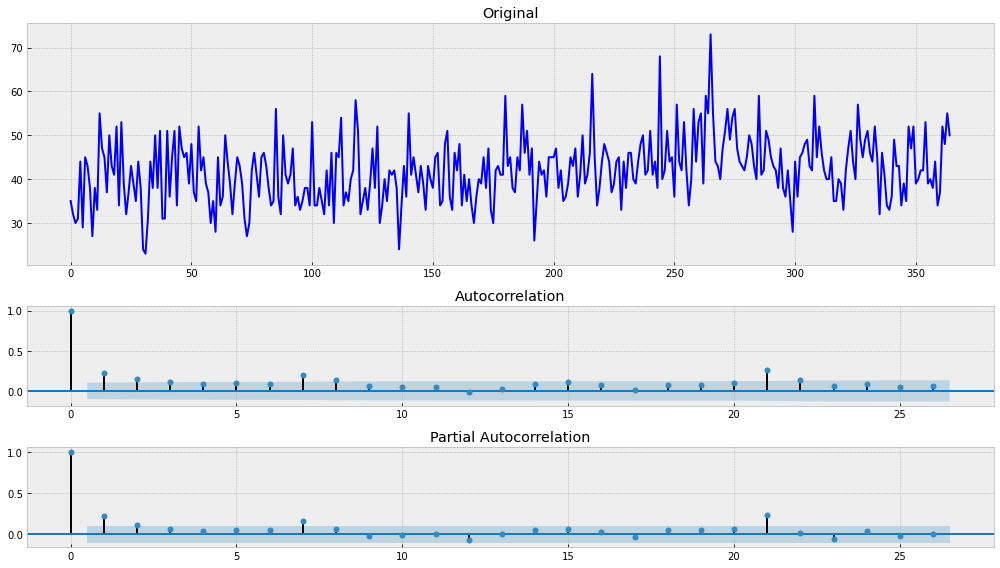

In [31]:
tsplot( female_births["Count"])

По тесту и по корреллограммам видим, что ряд "Daily total female births in California" действительно является стационарным.

## 2. "Mean monthly air temperature"

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


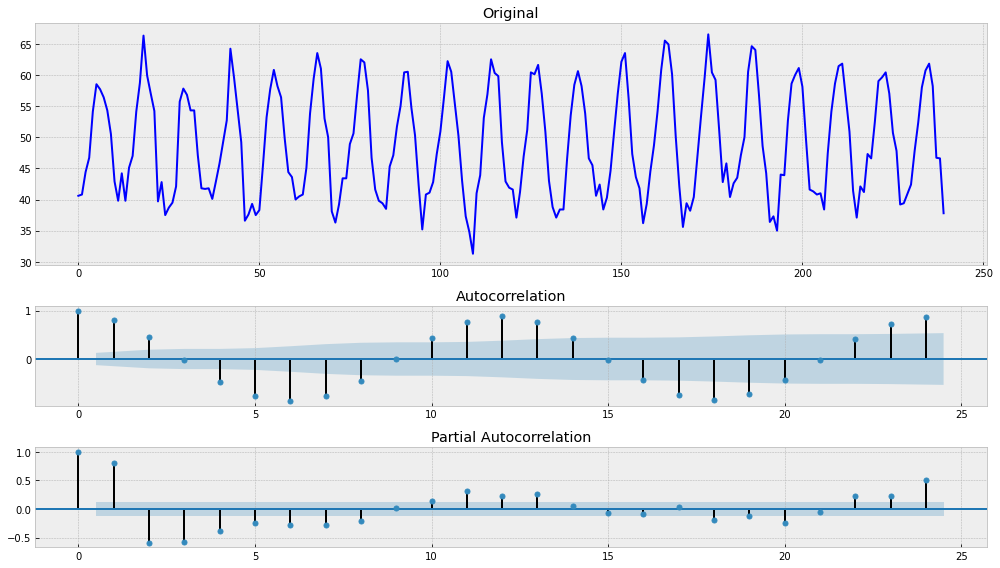

In [32]:
tsplot( mean_monthly_temp["Deg"])

Здесь по кореллограммам видно, что имеется сезонность. Уберём её, используя дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                -1.041098e+01
p-value                        1.804502e-18
#Lags Used                     1.500000e+01
Number of Observations Used    2.220000e+02
Critical Value (1%)           -3.460154e+00
Critical Value (5%)           -2.874649e+00
Critical Value (10%)          -2.573757e+00
dtype: float64


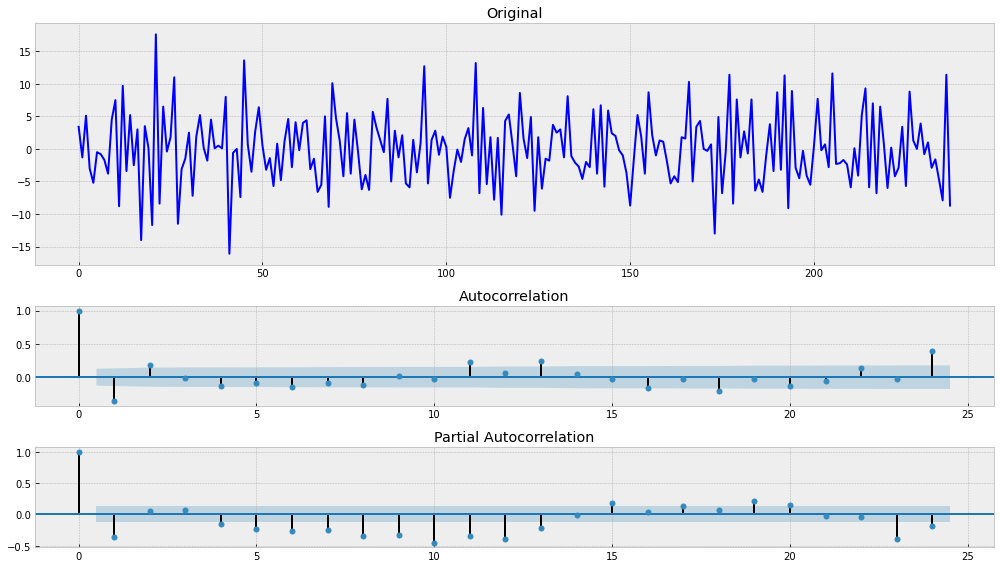

In [34]:
tsplot(np.diff(mean_monthly_temp["Deg"], 2))

Теперь ряд "Mean monthly air temperature" - стационарный.

## 3. "Monthly sales of company X"

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


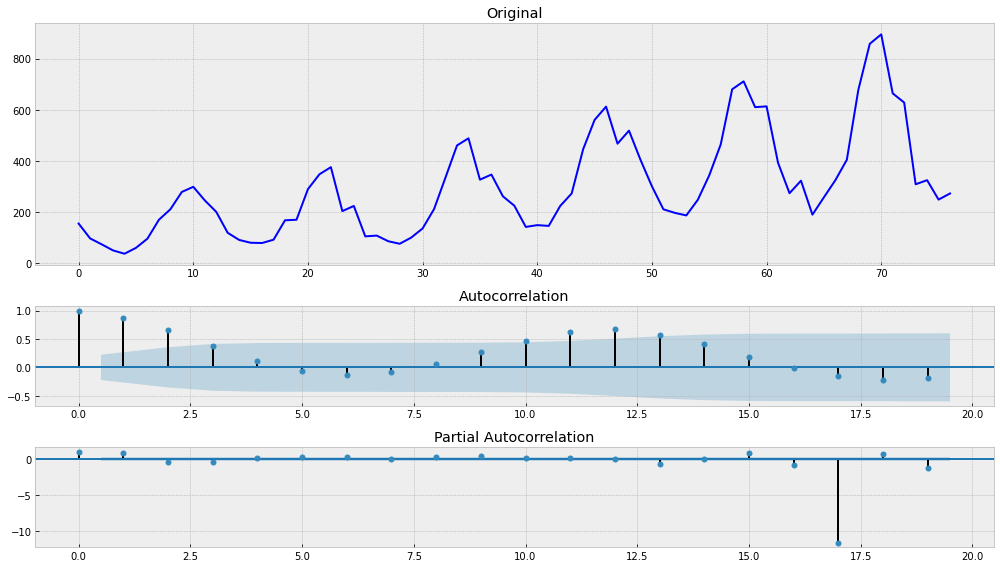

In [35]:
tsplot(all_series['Monthly sales of company X'])

Ряд "Monthly sales of company X" - нестационарный (графики и p-value=0.988889 это подтверждают).

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

In [38]:
monthly_sales_1 = boxcox(all_series["Monthly sales of company X"], 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


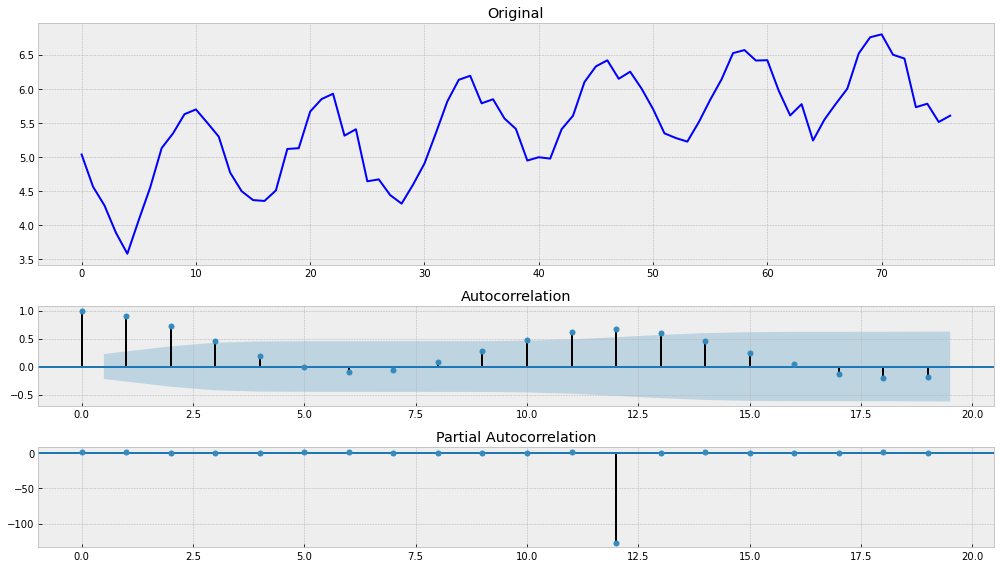

In [39]:
tsplot(monthly_sales_1)

Дисперсию уменьшили, но все еще p-value = 0.785310.

Уберем тренд с помощью дифференцирования.

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


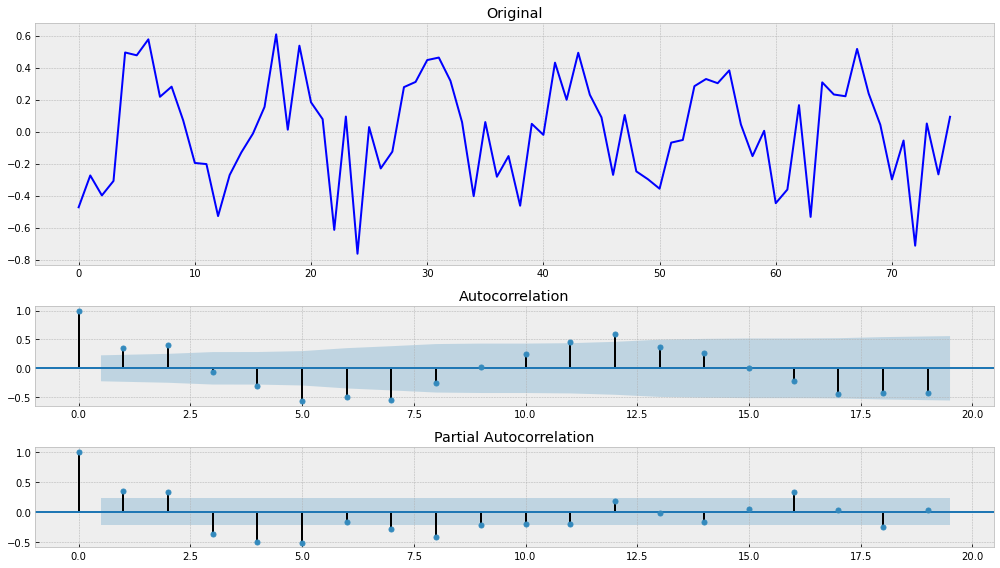

In [40]:
tsplot(np.diff(monthly_sales_1, 1))

Теперь ряд "Monthly sales of company X" - стационарный.

## 4. "Monthly Boston armed robberies"

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


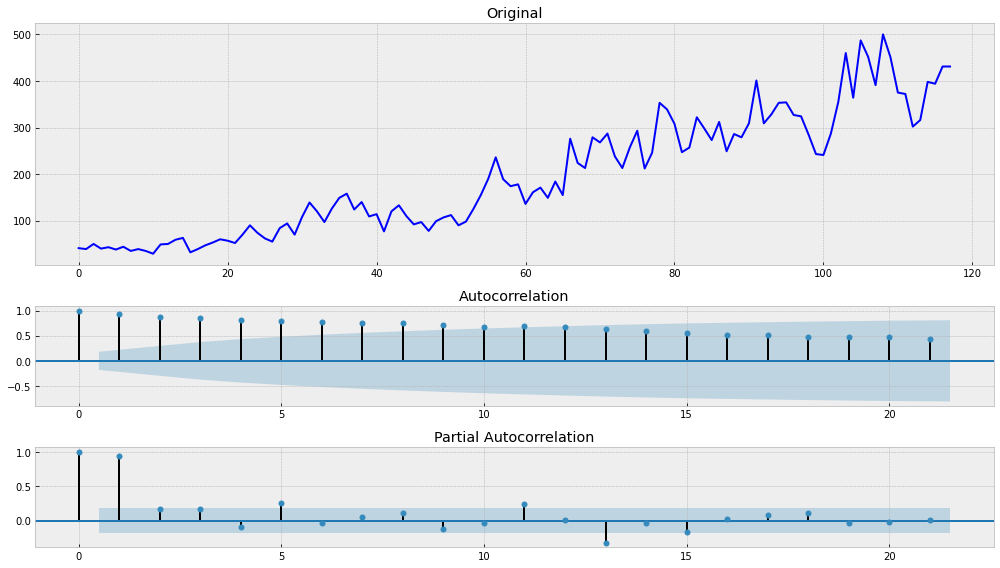

In [41]:
tsplot(all_series["Monthly Boston armed robberies"])

Вилим сильный тренд. Убеерм его с помощтю дифференцирования.

In [44]:
boston_armed_robberies_1 = np.diff(all_series["Monthly Boston armed robberies"], 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


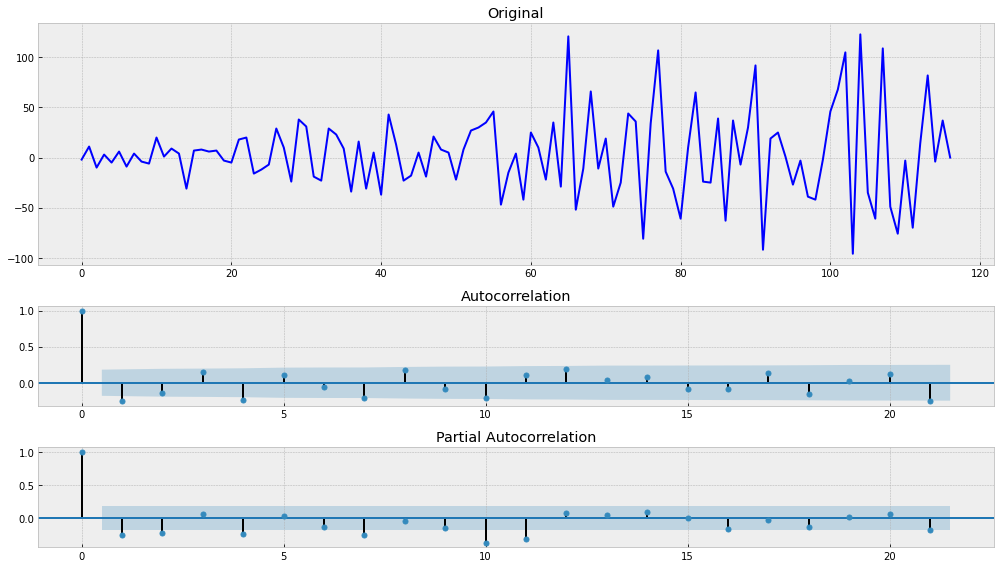

In [45]:
tsplot(boston_armed_robberies_1)

Теперь ряд "Monthly Boston armed robberies" - стационарный.

## 5. "International airline passengers: monthly totals in thousands"

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


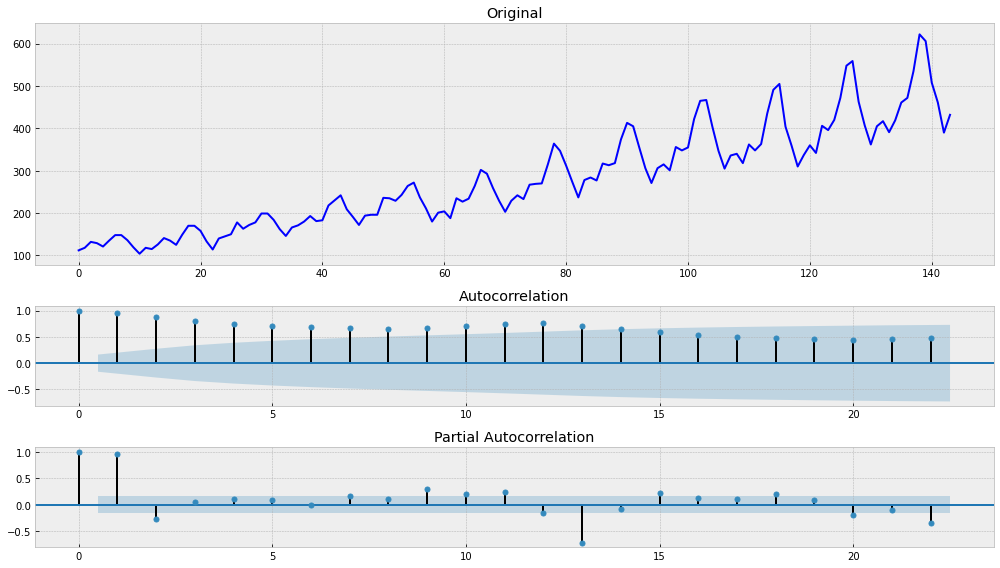

In [46]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

Видим и тренд и сезонность. Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

In [50]:
international_airline_passengers_1 = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


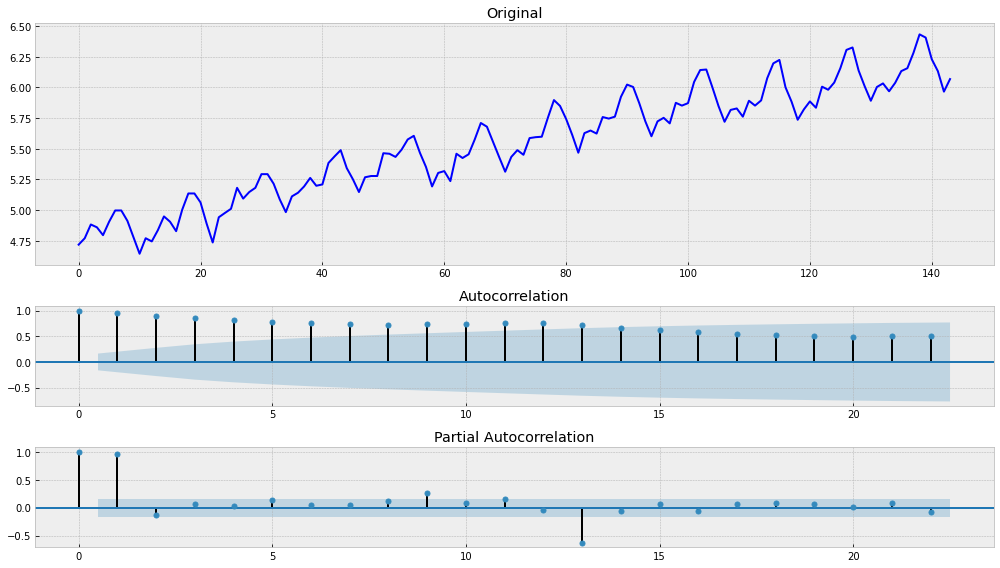

In [51]:
tsplot(international_airline_passengers_1)

Теперь при помощи дифференцирования уберем тренд.

In [52]:
international_airline_passengers_2 = np.diff(international_airline_passengers_1, 2)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


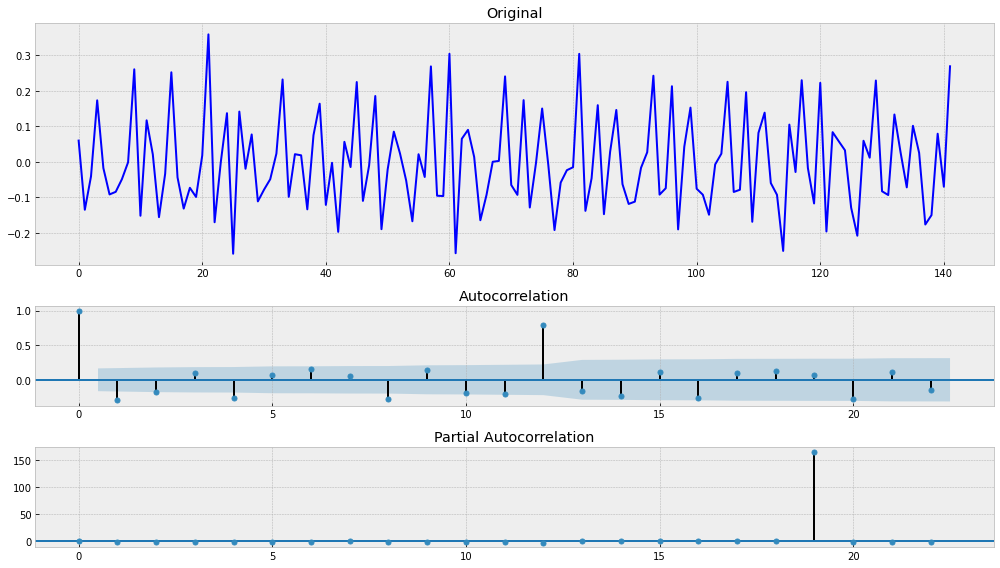

In [53]:
tsplot(international_airline_passengers_2)

Теперь ряд "International airline passengers: monthly totals in thousands" - стационарный.

## 6. "Weekly closings of the Dow-Jones industrial average"

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


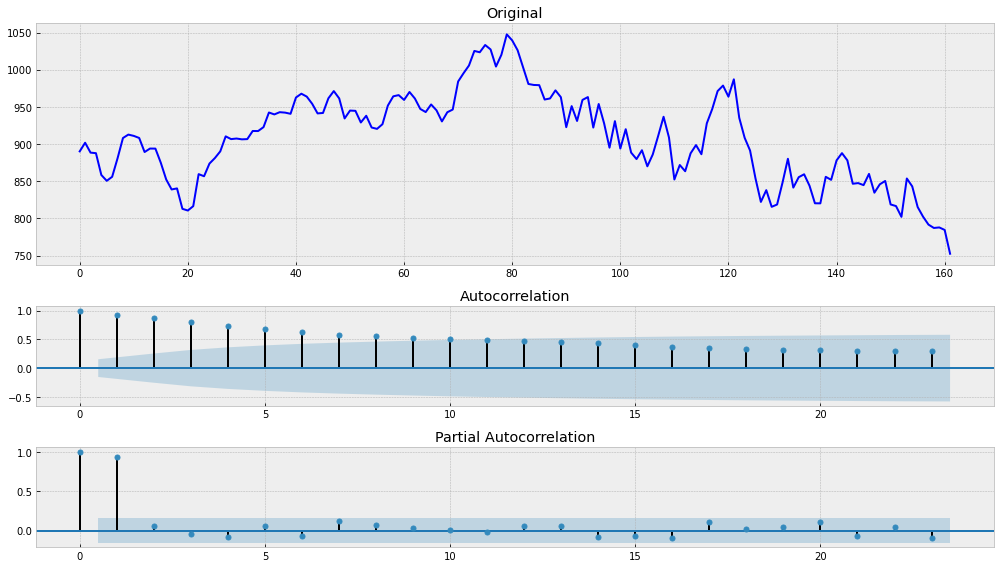

In [54]:
tsplot(all_series["Weekly closings of the Dow-Jones industrial average"])

Есть подозрение на тренд. Попробуем убрать его при помощи дифференцирования.

In [55]:
Dow_Jones = np.diff(all_series["Weekly closings of the Dow-Jones industrial average"], 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


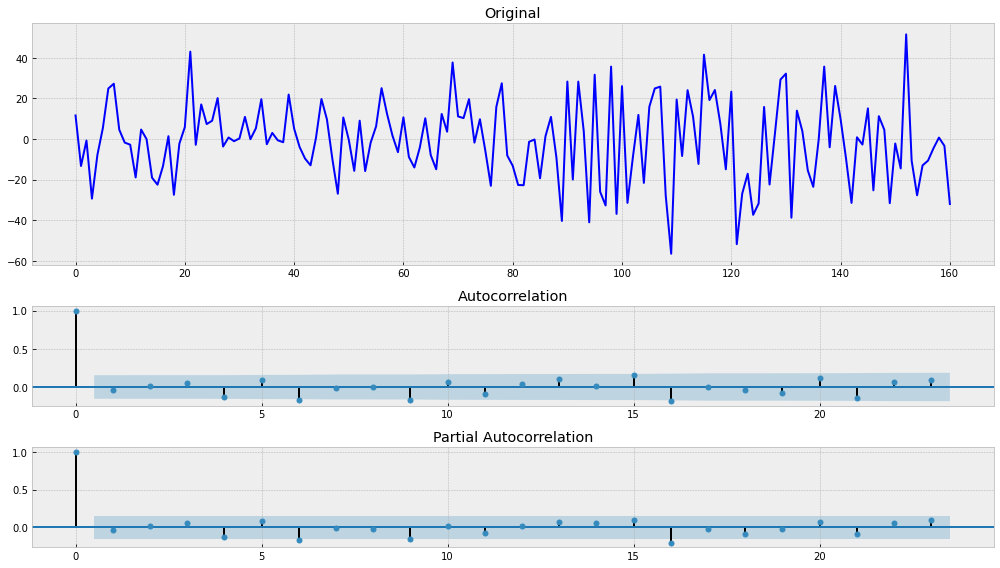

In [56]:
tsplot(Dow_Jones)

Теперь ряд "Weekly closings of the Dow-Jones industrial average" - стационарный.